# Adaptive Intelligence COM3240
## Lab 2: The BCM rule

### Learning Outcomes

- Understand the BCM rule and its functionality.
- Understand the difference between Hebbian rule and BCM rule.

## Lecture overview

Experimental evidence: both pre- and postsynaptic activity is needed in order for the synaptic weight to change.
 
BCM rule equation:  
$$ \frac{dw_{i,j}}{dt} = a_2^{corr} \Phi \left( v_i^{post}; \theta \right) v_j^{pre} $$
where $ \frac{dw_{i,j}}{dt}$ is the change of weight between an presynaptic neuron $j$ and $i$ a postsynaptic neuron $i$ , $a_2^{corr}$ is the learning rate (the amount of weight change over time in case of firing), $\Phi$ is a nonlinear function dependent of a threshold $\theta$ and the postsynaptic activity $v_i^{post}$, and $v_j^{pre}$ is the activity of the presynaptic neuron.

The BCM rule leads to specialized Neurons (developmental learning).

<img src=./icons/fig1.png>

With a sliding threshold $\theta$, the BCM rule implements competition between synapses.

## Laboratory 2: The BCM rule

### Exercise: Implementation of the BCM rule

Write a script that simulates the following scenarios and verify your result using logic argument. Note: choice of parameters may affect your results.
Synaptic changes follow equation, according to the BCM rule:

\begin{align}
\frac{dw_{i,j}}{dt} &= a_2^{corr} \Phi \left( v_i^{post}; \theta \right) v_j^{pre} && [1] \\
\Phi\left(v_i^{post}; \theta\right) &= v_i^{post}\left(v_i^{post} - \theta\right) && [2]  
\end{align}

The synaptic changes are plotted as a function of the postsynaptic firing rate:

<img src="./icons/fig2.png">

Let us assume the simplest dependence of the postsynaptic firing rate from the input current:
$$ v_i^{post} = \sum_j w_{i, j}v_j^{pre} [3] $$

and consider a postsynaptic neuron that receives input from 2 groups. Each group has 10 neurons and all weights are equal 1. If $\theta = 20 Hz$ consider the following three scenarios:

1. Group 1 fires at 3 Hz, then group 2 at 1 Hz. What happens?
2. Group 1 fires at 3 Hz, then group 2 at 2.5 Hz. What happens?
3. As in 2., but make theta a function of the averaged rate. What happens?

To reply to these questions you will need to implement the BCM rule in the following script.

In [1]:
# loading the libraries
import numpy as np                # docs.scipy.org/doc/numpy-1.10.0/reference/
import matplotlib.pyplot as plt   # matplotlib.org/api/pyplot_summary.html
import matplotlib

%matplotlib notebook

#### Parameters and initialization

In [2]:
# bcm -fixed threshold

# neuron count
G1 = 10     # group 1
G2 = 10     # group 2
N = G1 + G2 # total

# firing rates
fG1 = 3     #Hz i.e. sec^-1
fG2 = 1
theta = 20  # threshold

# max/min weights
maxW = 2
minW = -2
alpha = 1E-4

# number of iterations over which the weight change will be computed
iterations = 40

# weights -> we store the weight for each iteration in a row of a matrix
#            so that we can plot the weight evolution below
W = np.zeros((iterations, N))
initW = 1
# initialise first row of weights
W[0,:] = initW

#### Input 

In [3]:
# input activity
X = np.zeros((iterations, N))
# same as iterations/2 as python integer division returns floor
# http://python-history.blogspot.it/2010/08/why-pythons-integer-division-floors.html
midpoint = np.floor(iterations/2)
# we need to make sure that "midpoint" is integer because we are going to use it as index.
# if we skip this step then: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
midpoint = int(midpoint)

# 1st half: first group active (second  silent)
X[0:midpoint, 0:G1] = fG1       # remember indexing is start-point(included):end-point(not-included)
X[0:midpoint, G1:N+1] = 0

# 2nd half: second group active
X[midpoint:iterations+1, 0:G1] = 0
X[midpoint:iterations+1, G1:N+1] = fG2

####  BMC rule implementation and execution

In [4]:
for i in range(iterations):
    print ('iteration',i)
    # TODO: compute new weights and store them in the i-th row of the W matrix
    # (weights should be limited to the [minW,maxW] range)

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39


#### Plotting

<IPython.core.display.Javascript object>


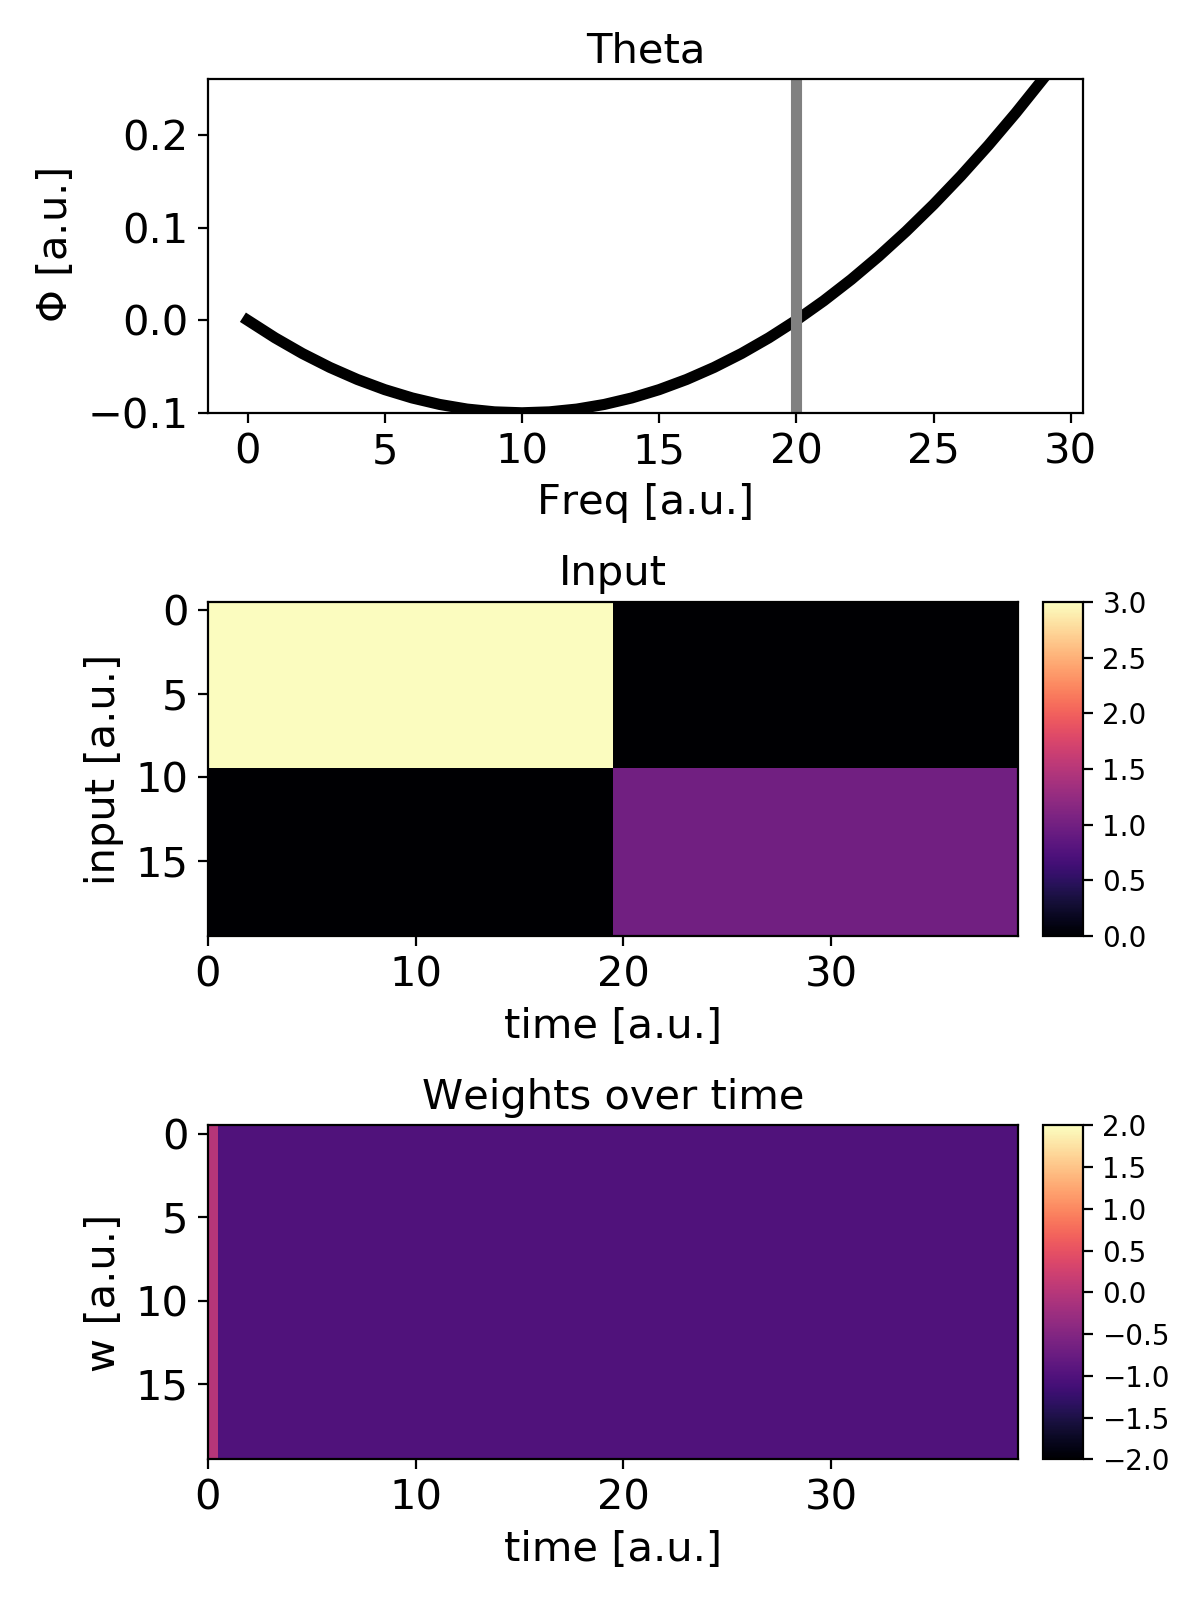

In [5]:
fs = 15                         # font size
lw = 4                          # line width
h = 'magma'                    # colormap 
matplotlib.interactive(False)   # plot all images

fig, axes = plt.subplots(3,1, figsize=(6,8)) # displays 3 figures in a set of 3 rows and 1 column
plt.title('BCM')

# Fig 1 - theta
axes[0].set_title('Theta', fontsize=fs)
y = np.arange(30)
phi = 1E-3 * (y * (y - theta))              # vector * vector is the element-wise multiplication
axes[0].plot(y,phi,'-',color='black', linewidth=lw)
axes[0].plot([theta, theta],[min(phi), max(phi)],'-',color='grey', linewidth=lw)
axes[0].set_xlabel('Freq [a.u.]',fontsize=fs)
axes[0].set_ylabel(r'$\Phi$ [a.u.]',fontsize=fs)    # r makes the string raw (needed for latex rendering)
axes[0].tick_params(axis='both',labelsize=fs)
axes[0].set_ylim(min(phi),max(phi))

# Fig 2 - input
axes[1].set_title('Input', fontsize=fs)
im1 = axes[1].imshow(X.T, interpolation='nearest', cmap=h)
axes[1].set_aspect('auto')
axes[1].set_xlabel('time [a.u.]',fontsize=fs)
axes[1].set_ylabel('input [a.u.]',fontsize=fs)
axes[1].tick_params(axis='both',labelsize=fs)
axes[1].set_xlim(0,iterations-1)

# # Fig 3 - weight change
axes[2].set_title('Weights over time', fontsize=fs)
im2 = axes[2].imshow(W.T - initW, interpolation='nearest', cmap=h)
axes[2].set_aspect('auto')
axes[2].set_xlabel('time [a.u.]',fontsize=fs)
axes[2].set_ylabel('w [a.u.]',fontsize=fs)
axes[2].tick_params(axis='both',labelsize=fs)
axes[2].set_xlim(0,iterations-1)

# Position the colorbars to the right of the images
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider1 = make_axes_locatable(axes[1])
divider2 = make_axes_locatable(axes[2])
cbar_ax1 = divider1.append_axes("right", "5%", pad="3%")
cbar_ax2 = divider2.append_axes("right", "5%", pad="3%")
cm1 = fig.colorbar(im1, cax=cbar_ax1)
cm2 = fig.colorbar(im2, cax=cbar_ax2)

# Set the color range for the images and colorbars
minX = X.min()
maxX = X.max()
im1.set_clim(vmin=minX, vmax=maxX)
cm1.set_clim(vmin=minX, vmax=maxX)

im2.set_clim(vmin=minW, vmax=maxW)
cm2.set_clim(vmin=minW, vmax=maxW)

# Compress everything to make it neat
fig.tight_layout()
plt.show()